In [4]:
import sklearn

import numpy as np
import pandas as pd

# plots
import seaborn as sns
import matplotlib.pyplot as plt

# feature correlation
from scipy.stats import chi2_contingency

In [5]:
data_raw = pd.read_csv('../data/data.csv')
train = pd.read_csv('../data/train_balnced_no_test.csv')
test = pd.read_csv('../data/test_umbalanced.csv')

<AxesSubplot:>

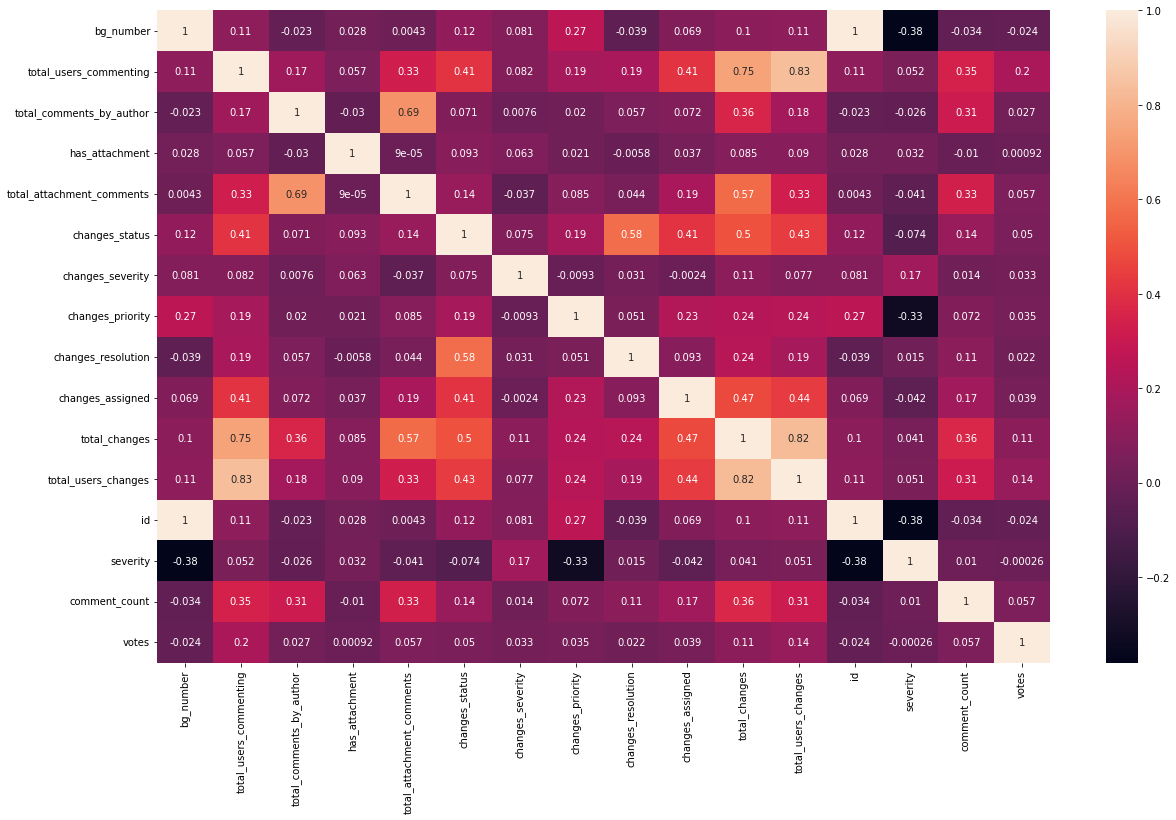

In [13]:
fig, ax = plt.subplots(figsize=(20, 12))

sns.heatmap(data_raw.corr(), ax=ax, annot=True)

In [12]:
data_corr = data_raw.copy()


# Select the relevant columns for correlation calculation
numeric_columns = ["bg_number", "total_users_commenting", "total_comments_by_author",
                   "total_attachment_comments", "changes_status", "changes_severity",
                   "changes_priority", "changes_resolution", "changes_assigned",
                   "total_changes", "total_users_changes", "comment_count"]

non_numeric_columns = ["has_attachment", "severity", "platform", "priority", "resolution",
                       "status", "version", "type", "product", "component", "creator",
                       "op_sys", "flags", "assigned_to"]

# Select the columns in the DataFrame
selected_columns = numeric_columns + non_numeric_columns
df = data_corr[selected_columns]

# Calculate the correlation matrix
correlation_matrix = np.zeros((len(selected_columns), len(selected_columns)))

for i, feature_i in enumerate(selected_columns):
    for j, feature_j in enumerate(selected_columns):
        if i == j:
            correlation_matrix[i, j] = 1.0
        elif i < j:
            if feature_i in numeric_columns and feature_j in numeric_columns:
                correlation_matrix[i, j] = np.corrcoef(df[feature_i], df[feature_j])[0, 1]
            else:
                correlation_matrix[i, j] = 1.0
                contingency_table = pd.crosstab(df[feature_i], df[feature_j])
                _, _, _, p_value = chi2_contingency(contingency_table)
                print(p_value)
                #correlation_matrix[i, j] = np.sqrt(p_value)
        else:
            correlation_matrix[i, j] = correlation_matrix[j, i]

# Create a DataFrame from the correlation matrix
correlation_df = pd.DataFrame(correlation_matrix, columns=selected_columns, index=selected_columns)

# Display the correlation matrix
print(correlation_df)


[[0.82012089 0.17987911]
 [0.82012089 0.17987911]
 [0.82012089 0.17987911]
 ...
 [0.82012089 0.17987911]
 [0.82012089 0.17987911]
 [0.82012089 0.17987911]]
[[0.02613201 0.02434443 0.660905   0.06386814 0.22475042]
 [0.02613201 0.02434443 0.660905   0.06386814 0.22475042]
 [0.02613201 0.02434443 0.660905   0.06386814 0.22475042]
 ...
 [0.02613201 0.02434443 0.660905   0.06386814 0.22475042]
 [0.02613201 0.02434443 0.660905   0.06386814 0.22475042]
 [0.02613201 0.02434443 0.660905   0.06386814 0.22475042]]
[[3.05100665e-02 1.89362379e-03 2.50261320e-01 ... 1.51489903e-05
  1.18646892e-01 1.32129494e-01]
 [3.05100665e-02 1.89362379e-03 2.50261320e-01 ... 1.51489903e-05
  1.18646892e-01 1.32129494e-01]
 [3.05100665e-02 1.89362379e-03 2.50261320e-01 ... 1.51489903e-05
  1.18646892e-01 1.32129494e-01]
 ...
 [3.05100665e-02 1.89362379e-03 2.50261320e-01 ... 1.51489903e-05
  1.18646892e-01 1.32129494e-01]
 [3.05100665e-02 1.89362379e-03 2.50261320e-01 ... 1.51489903e-05
  1.18646892e-01 1.3212

In [ ]:
# filing the null values whit empty string
# making features from textual data

data_raw['description'].fillna('', inplace=True)
data_raw['total_words_desc'] = data_raw.apply(lambda row: len(list(tokenize(row['description']))), axis=1)

data_raw['summary'].fillna('', inplace=True)
data_raw['total_words_summary'] = data_raw.apply(lambda row: len(list(tokenize(row['summary']))), axis=1)


In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Load the target dataset
dataset = train.copy()

# Separate the features and target variable
X = dataset.drop('label', axis=1)  # Replace 'target_variable' with the actual target column name
y = dataset['label']  # Replace 'target_variable' with the actual target column name

# Calculate the symmetric uncertainty coefficients for each feature
suc_scores = mutual_info_classif(X, y)

# Create a DataFrame to store the feature names and corresponding SU coefficients
feature_scores = pd.DataFrame({'Feature': X.columns, 'SU Coefficient': suc_scores})

# Sort the features based on SU coefficients in descending order
feature_scores = feature_scores.sort_values('SU Coefficient', ascending=False)

# Print the feature scores
print(feature_scores)

# Select the top 'k' features based on the SU coefficients
k = 10  # Replace 'k' with the desired number of top features
selected_features = feature_scores.head(k)['Feature'].values

# Print the selected features
print(f'Selected Features: {selected_features}')

                           Feature  SU Coefficient
0                        bg_number        1.892210
15                total_words_desc        0.474897
13                   comment_count        0.153779
12                        severity        0.148999
4        total_attachment_comments        0.141762
..                             ...             ...
456  version_SeaMonkey 2.24 Branch        0.000000
858                component_Menus        0.000000
457  version_SeaMonkey 2.25 Branch        0.000000
856     component_Memory Allocator        0.000000
943             component_Printing        0.000000

[1227 rows x 2 columns]
Selected Features: ['bg_number' 'total_words_desc' 'comment_count' 'severity'
 'total_attachment_comments' 'total_changes' 'component_Widget: Gtk'
 'changes_assigned' 'total_users_commenting' 'total_users_changes']


In [9]:
for index, row in feature_scores.iterrows():
    print(row['Feature'], row['SU Coefficient'])

bg_number 1.892209809546366
total_words_desc 0.47489652527757276
comment_count 0.1537791243960207
severity 0.14899882318901048
total_attachment_comments 0.14176175716089734
total_changes 0.1353985433359859
component_Widget: Gtk 0.10327127275813774
changes_assigned 0.10326202913279037
total_users_commenting 0.07939873948958587
total_users_changes 0.06724535534103415
status_RESOLVED 0.05986079513382503
total_words_summary 0.0586682793474238
total_comments_by_author 0.056339696909253334
changes_status 0.05486850994260095
status_VERIFIED 0.05408829623168776
platform_Unspecified 0.05000282567970604
changes_priority 0.049136318061824724
priority_P1 0.048626298113966016
priority_-- 0.046692009684978775
op_sys_Windows 0.03605887739543068
version_Firefox 90 0.03310183477287776
component_XPConnect 0.03150082028810397
priority_P5 0.026407901141988432
platform_All 0.02625771393397791
product_Toolkit 0.025111237411918452
votes 0.021877886495887733
component_Add-ons Manager 0.021844736127590636
op_s

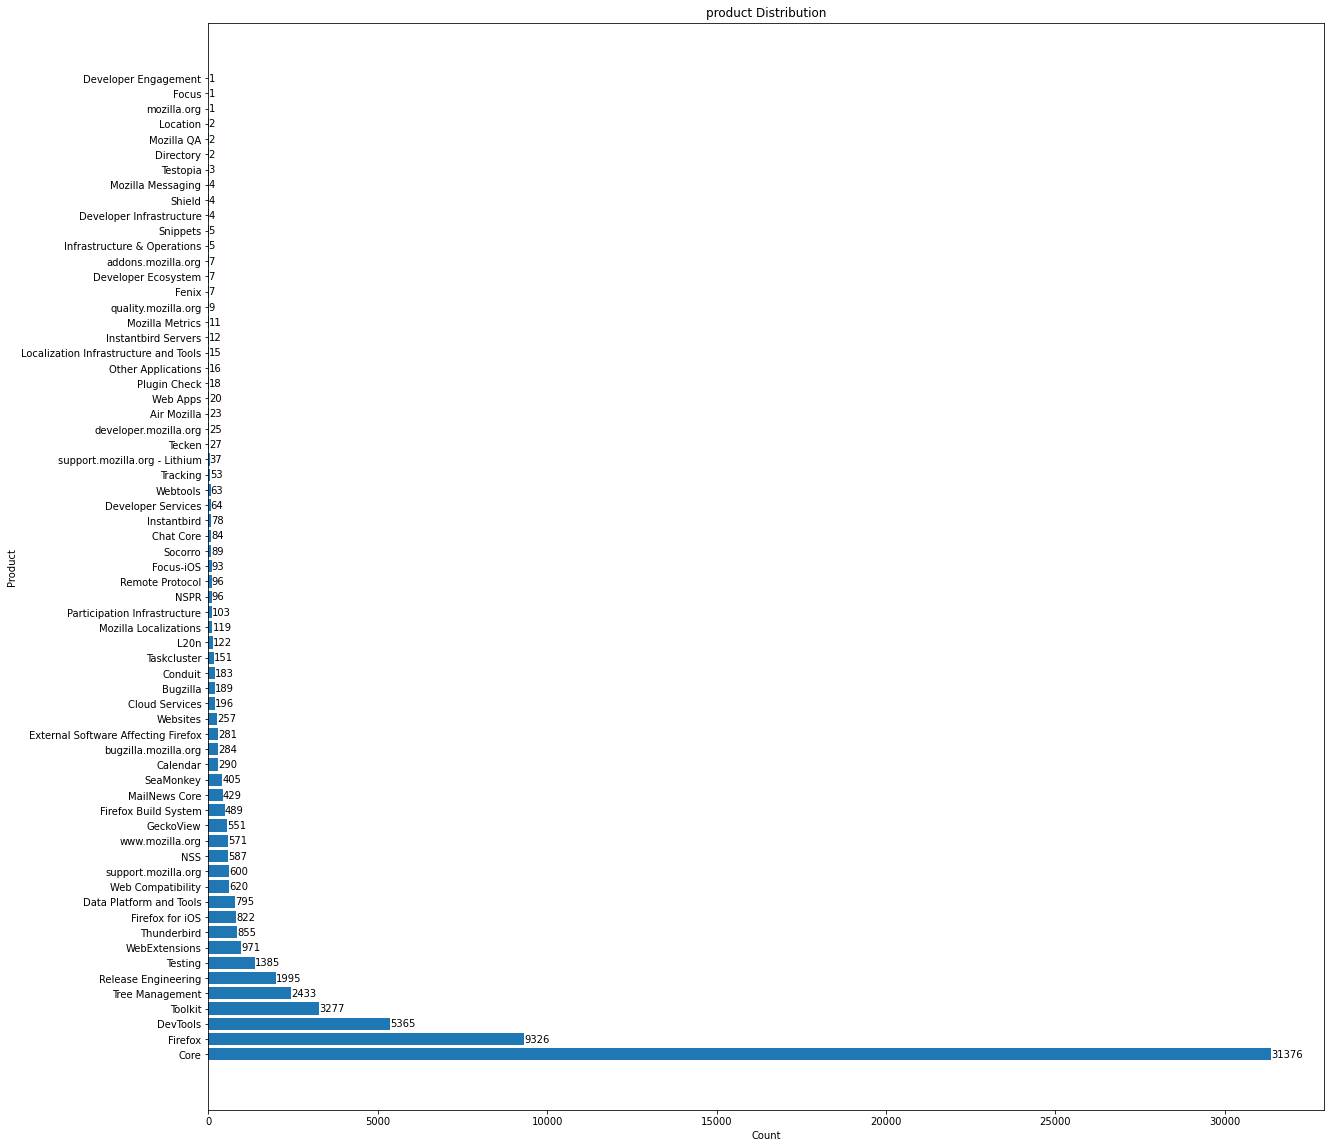

In [17]:
# Extract the 'platform' column from the DataFrame
platform_data = data_raw['product']

# Plot the distribution graph
# Count the occurrences of each platform
platform_counts = platform_data.value_counts()

# Plot the distribution graph
plt.figure(figsize=(20, 20))  # Increase the size of the plot
plt.barh(platform_counts.index, platform_counts.values)
plt.xlabel('Count')
plt.ylabel('Product')
plt.title('product Distribution')
# Display the count at the end of each bar
for i, count in enumerate(platform_counts.values):
    plt.text(count, i, str(count), va='center')

plt.show()


In [18]:
import requests
import json

def download_bug_reports(projects):
    base_url = 'https://bugzilla.redhat.com/'  # Replace with your Bugzilla instance URL
    
    for project in projects:
        # Fetch bug reports for the project
        bug_search_url = f'{base_url}/rest/bug?product={project}&include_fields=id'
        response = requests.get(bug_search_url)
        print('here')
        if response.status_code == 200:
            bug_ids = [bug['id'] for bug in response.json()['bugs']]
            
            for bug_id in bug_ids:
                # Fetch bug details
                bug_url = f'{base_url}/rest/bug/{bug_id}'
                bug_response = requests.get(bug_url)
                
                if bug_response.status_code == 200:
                    bug_data = bug_response.json()['bugs'][0]
                    bug_file = f'bug_{bug_id}.json'
                    
                    # Save bug details to a file
                    with open(bug_file, 'w') as file:
                        json.dump(bug_data, file)
                    
                    print(f"Bug {bug_id} downloaded successfully.")
                    
                    # Fetch bug history
                    history_url = f'{base_url}/rest/bug/{bug_id}/history'
                    history_response = requests.get(history_url)
                    
                    if history_response.status_code == 200:
                        history_data = history_response.json()['bugs'][0]
                        history_file = f'bug_{bug_id}_history.json'
                        
                        # Save bug history to a file
                        with open(history_file, 'w') as file:
                            json.dump(history_data, file)
                            
                        print(f"Bug {bug_id} history downloaded successfully.")
                    
                    # Fetch bug comments
                    comment_url = f'{base_url}/rest/bug/{bug_id}/comment'
                    comment_response = requests.get(comment_url)
                    
                    if comment_response.status_code == 200:
                        comment_data = comment_response.json()['bugs'][str(bug_id)]
                        comment_file = f'bug_{bug_id}_comments.json'
                        
                        # Save bug comments to a file
                        with open(comment_file, 'w') as file:
                            json.dump(comment_data, file)
                            
                        print(f"Bug {bug_id} comments downloaded successfully.")
                else:
                    print(f"Failed to fetch bug {bug_id} details.")
        else:
            print(f"Failed to fetch bug reports for project {project}.")
    
        break

# Specify the projects you want to download bug reports from
projects_to_download = ['Red Hat']

download_bug_reports(projects_to_download)
